# Reading Dataset

In [1]:
# Read dataset using pandas.
import pandas as pd 

data = pd.read_csv('dataset3.csv')

data.head()

,Unnamed: 0,input,target
0,0,New and new technology has been introduced to...,New technology has been introduced to society .
1,1,New and new technology has been introduced to...,New technology has been introduced into the so...
2,2,New and new technology has been introduced to...,Newer and newer technology has been introduced...
3,3,New and new technology has been introduced to...,Newer and newer technology has been introduced...
4,4,One possible outcome is that an environmental...,One possible outcome is that an environmentall...


In [2]:
df1 = pd.DataFrame(data['input'])
df2 = pd.DataFrame(data['target'])

In [3]:
df1.insert(1, 'Target', 0, True)
df2.insert(1, 'Target', 1, True )

In [4]:
df2.rename(columns = {'target': 'input'}, inplace = True)

In [5]:
df1.head()

,input,Target
0,New and new technology has been introduced to...,0
1,New and new technology has been introduced to...,0
2,New and new technology has been introduced to...,0
3,New and new technology has been introduced to...,0
4,One possible outcome is that an environmental...,0


In [6]:
df2.head()

,input,Target
0,New technology has been introduced to society .,1
1,New technology has been introduced into the so...,1
2,Newer and newer technology has been introduced...,1
3,Newer and newer technology has been introduced...,1
4,One possible outcome is that an environmentall...,1


In [7]:
dff = pd.concat([df1, df2], axis = 0)

print(len(dff))
dff.head()

12008


,input,Target
0,New and new technology has been introduced to...,0
1,New and new technology has been introduced to...,0
2,New and new technology has been introduced to...,0
3,New and new technology has been introduced to...,0
4,One possible outcome is that an environmental...,0


In [8]:
dff.dtypes

input     object
Target     int64
dtype: object

# Preprocessing in Dataset

In [9]:
# Make mask to check if have Missing values.
mask = dff.isnull().any(axis = 1)

data_cleaning = dff[~mask]

In [10]:
print(len(dff))
print(len(data_cleaning))

12008
12008


## Splitting dataset into Input and Output

In [11]:

# Splitting dataset to input and output.
data_input = dff['input']
data_output = dff['Target']

data_input.head()

0     New and new technology has been introduced to...
1     New and new technology has been introduced to...
2     New and new technology has been introduced to...
3     New and new technology has been introduced to...
4     One possible outcome is that an environmental...
Name: input, dtype: object

In [12]:
# Show the output.
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [13]:
import numpy as np

data_input = np.array(data_input)
data_output = np.array(data_output)

In [14]:
print(data_input[0])
print(data_input[6005])

 New and new technology has been introduced to the society .
New technology has been introduced into the society .


## Tokenization And Stemming

In [15]:
from tqdm import tqdm
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
wl = WordNetLemmatizer()
import string
stem_token=[]

stopwords = stopwords.words('english')

for sen in tqdm(data_input):
    # Make Tokenizion and Stemming.
    token = word_tokenize(sen)
    tokens_stem = [wl.lemmatize(word) for word in token]
    
    # Delete punctuation and stop words.
    sen = ' '.join(i for i in tokens_stem if i not in string.punctuation )
    stem_token.append(sen)

100%|██████████████████████████████████████████████████████████████████████████| 12008/12008 [00:08<00:00, 1489.94it/s]


In [16]:
# Show the first en item of list.
stem_token[0:10]

['new new technolog ha introduc societi',
 'new new technolog ha introduc societi',
 'new new technolog ha introduc societi',
 'new new technolog ha introduc societi',
 'one possibl outcom environmentally-induc reduct motor level richer countri outweigh ani rise motor level poorer countri',
 'one possibl outcom environmentally-induc reduct motor level richer countri outweigh ani rise motor level poorer countri',
 'one possibl outcom environmentally-induc reduct motor level richer countri outweigh ani rise motor level poorer countri',
 'one possibl outcom environmentally-induc reduct motor level richer countri outweigh ani rise motor level poorer countri',
 'everi person need know bit math scienc art literatur histori order stand societi',
 'everi person need know bit math scienc art literatur histori order stand societi']

## POS(Part Of Speech)

In [17]:
import nltk

# Using POS ==> Part Of Speech.
tagged = nltk.pos_tag(stem_token)

# Show the first ten item of tagged.
tagged[0:10]

[('new new technolog ha introduc societi', 'JJ'),
 ('new new technolog ha introduc societi', 'JJ'),
 ('new new technolog ha introduc societi', 'JJ'),
 ('new new technolog ha introduc societi', 'JJ'),
 ('one possibl outcom environmentally-induc reduct motor level richer countri outweigh ani rise motor level poorer countri',
  'JJ'),
 ('one possibl outcom environmentally-induc reduct motor level richer countri outweigh ani rise motor level poorer countri',
  'JJ'),
 ('one possibl outcom environmentally-induc reduct motor level richer countri outweigh ani rise motor level poorer countri',
  'JJ'),
 ('one possibl outcom environmentally-induc reduct motor level richer countri outweigh ani rise motor level poorer countri',
  'JJ'),
 ('everi person need know bit math scienc art literatur histori order stand societi',
  'NN'),
 ('everi person need know bit math scienc art literatur histori order stand societi',
  'NN')]

## Using spacy Library

In [18]:
import numpy as np
import spacy
import string
nlp = spacy.load('en_core_web_sm')

text = data_input[0]

for token in nlp(text):
    print(token.text, '=>', token.dep_,'=>',token.head.text)

  => dep => New
New => amod => technology
and => cc => New
new => conj => New
technology => nsubjpass => introduced
has => aux => introduced
been => auxpass => introduced
introduced => ROOT => introduced
to => prep => introduced
the => det => society
society => pobj => to
. => punct => introduced


# Visualization Dataset Using Spacy

In [19]:
# Make visualization to data to see relationship.
from spacy import displacy
displacy.render(nlp(data_input[0]), jupyter = True, style = 'dep', options = {'distance': 90})

In [20]:
# See another way to visualization data.
from spacy import displacy
displacy.render(nlp(data_input[0]), jupyter = True, style = 'dep', options = {'compact': True, 'bg': '#09a3d5',
                                                                           'distance': 90, 'color': 'white',
                                                                           'font': 'Pacifico Regular'
                                                                           })

In [21]:
# Use another way to visulaize data about using NER.
text = data_input[101]
doc = nlp(text)

displacy.render(doc, style = 'ent', jupyter = True)

In [22]:
text = data_input[100]
doc = nlp(text)

displacy.render(doc, style = 'dep', jupyter = True, options = {'distance': 60})

# Extraction Dataset Using TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
tfidf_vec_fit = tfidf_vec.fit(stem_token)
X_tfidf = tfidf_vec.fit_transform(stem_token)
print(X_tfidf.shape)
data_input = pd.DataFrame(X_tfidf.toarray(), columns = tfidf_vec.get_feature_names_out())
data_input.head()

(12008, 4279)


,0th,10,100,100million,12,12years,1400,1400s,1st,1th,...,youngster,youngsters,your,yourself,youself,youth,ypu,zebra,zenra,zhenning
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output,
                                        test_size = 0.20, random_state = 2)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [18]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_val.shape)
print(y_val.shape)
print()
print(X_test.shape)
print(y_test.shape)

(7684, 4279)
(7684,)

(1922, 4279)
(1922,)

(2402, 4279)
(2402,)


In [184]:
X_train.head()

,0th,10,100,100million,12,12years,1400,1400s,1st,1th,...,youngster,youngsters,your,yourself,youself,youth,ypu,zebra,zenra,zhenning
6911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
# Make for loop to change the deepth of DecisionTree and know what the best result. 
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accu_train_values = []
accu_val_values = []

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 2)
    model.fit(X_train,y_train)
    y_predict_train = model.predict(X_train)
    y_predict_val = model.predict(X_val)
    accu_train = accuracy_score(y_train,y_predict_train)
    accu_val = accuracy_score(y_val,y_predict_val)
    accu_train_values.append(accu_train)
    accu_val_values.append(accu_val)

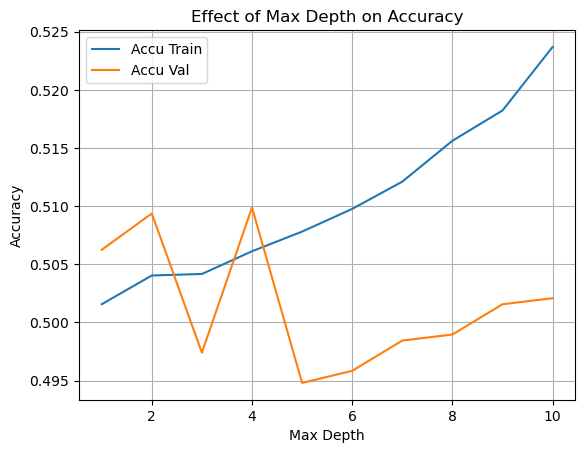

In [161]:
# Use matplotlib to know the defferent accuracy betwen train and validation.
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(max_depth_values,accu_train_values, label = 'Accu Train')
plt.plot(max_depth_values,accu_val_values, label = 'Accu Val')
plt.legend()
plt.grid(axis='both')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth on Accuracy')
plt.show()

In [162]:
from sklearn.tree import DecisionTreeClassifier

# Take object from the model.
dt = DecisionTreeClassifier()

# Train Model.
dt.fit(X_train, y_train)

# Predict the value of Train.
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)

In [163]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

# Two list have all values of train and validation.
train_data = []
val_data = []

# Calculate accuracy, precision and recall to train data.
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
train_data.append(accuracy_train)

# Calculate accuracy, precision and recall to validation data.
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
val_data.append(accuracy_val)

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),
                                                         round(recall_train, 3), round(accuracy_train, 3)))
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),
                                                         round(recall_val, 3), round(accuracy_val, 3)))
print()
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_val, y_val_pred))
print()
print (classification_report(y_train, y_train_pred))
print (classification_report(y_val, y_val_pred))

Precision: 0.966 / Recall: 0.84 / Accuracy: 0.905
Precision: 0.835 / Recall: 0.548 / Accuracy: 0.718

[[3738  114]
 [ 613 3219]]
[[850 105]
 [437 530]]

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3852
           1       0.97      0.84      0.90      3832

    accuracy                           0.91      7684
   macro avg       0.91      0.91      0.90      7684
weighted avg       0.91      0.91      0.90      7684

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       955
           1       0.83      0.55      0.66       967

    accuracy                           0.72      1922
   macro avg       0.75      0.72      0.71      1922
weighted avg       0.75      0.72      0.71      1922



In [164]:
from sklearn.svm import SVC

# Take object from the model.
dt = SVC(kernel = 'poly', degree = 5, random_state = 1, C = 50)

# Train Model.
dt.fit(X_train, y_train)

# Predict the value of Train.
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)

In [165]:
# Calculate accuracy, precision and recall to train data.
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
train_data.append(accuracy_train)

# Calculate accuracy, precision and recall to validation data.
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
val_data.append(accuracy_val)

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),
                                                         round(recall_train, 3), round(accuracy_train, 3)))
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),
                                                         round(recall_val, 3), round(accuracy_val, 3)))
print()
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_val, y_val_pred))
print()
print (classification_report(y_train, y_train_pred))
print (classification_report(y_val, y_val_pred))

Precision: 0.914 / Recall: 0.892 / Accuracy: 0.905
Precision: 0.776 / Recall: 0.658 / Accuracy: 0.732

[[3532  320]
 [ 413 3419]]
[[771 184]
 [331 636]]

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3852
           1       0.91      0.89      0.90      3832

    accuracy                           0.90      7684
   macro avg       0.90      0.90      0.90      7684
weighted avg       0.90      0.90      0.90      7684

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       955
           1       0.78      0.66      0.71       967

    accuracy                           0.73      1922
   macro avg       0.74      0.73      0.73      1922
weighted avg       0.74      0.73      0.73      1922



In [166]:
from sklearn.svm import SVC

# Take object from the model.
dt = SVC(kernel = 'rbf', gamma = 0.01, random_state = 1, C = 1)

# Train Model.
dt.fit(X_train, y_train)

# Predict the value of Train.
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)


In [167]:
import warnings
warnings.filterwarnings('ignore')

# Calculate accuracy, precision and recall to train data.
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
train_data.append(accuracy_train)

# Calculate accuracy, precision and recall to validation data.
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
val_data.append(accuracy_val)

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),
                                                         round(recall_train, 3), round(accuracy_train, 3)))
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),
                                                         round(recall_val, 3), round(accuracy_val, 3)))
print()
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_val, y_val_pred))
print()
print (classification_report(y_train, y_train_pred))
print (classification_report(y_val, y_val_pred))

Precision: 0.0 / Recall: 0.0 / Accuracy: 0.501
Precision: 0.0 / Recall: 0.0 / Accuracy: 0.497

[[3852    0]
 [3832    0]]
[[955   0]
 [967   0]]

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3852
           1       0.00      0.00      0.00      3832

    accuracy                           0.50      7684
   macro avg       0.25      0.50      0.33      7684
weighted avg       0.25      0.50      0.33      7684

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       955
           1       0.00      0.00      0.00       967

    accuracy                           0.50      1922
   macro avg       0.25      0.50      0.33      1922
weighted avg       0.25      0.50      0.33      1922



In [168]:
from sklearn.ensemble import RandomForestClassifier

# Take object from model.
rf = RandomForestClassifier()

# Train Model.
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

In [169]:
# Calculate accuracy, recall and percsion to train_data.
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
train_data.append(accuracy_train)

# Calculate accuracy, recall and percsion to val_data.
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
val_data.append(accuracy_val)

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),
                                                         round(recall_train, 3), round(accuracy_train, 3)))
print()
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),
                                                         round(recall_val, 3), round(accuracy_val, 3)))
print(confusion_matrix(y_train, y_train_pred))
print()
print(confusion_matrix(y_val, y_val_pred))
print()
print(classification_report(y_train, y_train_pred))
print()
print (classification_report(y_val, y_val_pred))

Precision: 0.933 / Recall: 0.872 / Accuracy: 0.905

Precision: 0.776 / Recall: 0.576 / Accuracy: 0.703
[[3613  239]
 [ 489 3343]]

[[794 161]
 [410 557]]

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3852
           1       0.93      0.87      0.90      3832

    accuracy                           0.91      7684
   macro avg       0.91      0.91      0.91      7684
weighted avg       0.91      0.91      0.91      7684


              precision    recall  f1-score   support

           0       0.66      0.83      0.74       955
           1       0.78      0.58      0.66       967

    accuracy                           0.70      1922
   macro avg       0.72      0.70      0.70      1922
weighted avg       0.72      0.70      0.70      1922



In [170]:
# Import model LogisticRegression.
from sklearn.linear_model import LogisticRegression

In [171]:
# Take object from model.
model = LogisticRegression()

# Train Model.
model.fit(X_train, y_train)

# Predict about values of training and validation.
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [172]:
# Calculate accuracy, recall and percsion to train_data.
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
train_data.append(accuracy_train)

# Calculate accuracy, recall and percsion to val_data.
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
val_data.append(accuracy_val)

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),
                                                         round(recall_train, 3), round(accuracy_train, 3)))
print()
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_val, 3),
                                                         round(recall_val, 3), round(accuracy_val, 3)))
print(confusion_matrix(y_train, y_train_pred))
print()
print(confusion_matrix(y_val, y_val_pred))
print()
print(classification_report(y_train, y_train_pred))
print()
print (classification_report(y_val, y_val_pred))

Precision: 0.72 / Recall: 0.736 / Accuracy: 0.726

Precision: 0.53 / Recall: 0.525 / Accuracy: 0.527
[[2757 1095]
 [1013 2819]]

[[505 450]
 [459 508]]

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      3852
           1       0.72      0.74      0.73      3832

    accuracy                           0.73      7684
   macro avg       0.73      0.73      0.73      7684
weighted avg       0.73      0.73      0.73      7684


              precision    recall  f1-score   support

           0       0.52      0.53      0.53       955
           1       0.53      0.53      0.53       967

    accuracy                           0.53      1922
   macro avg       0.53      0.53      0.53      1922
weighted avg       0.53      0.53      0.53      1922



In [173]:
# Dectionary have 3 list.
# model ==> name of model , train ==> accuracy of train , val ==> accuracy of val
all_result = {
    'model': [],
    'train': [],
    'val': []
}

all_result['model'] = ['decsion_tree', 'svc_poly', 'svc_ln', 'random_forest', 'logistic']
all_result['train'] = train_data
all_result['val'] = val_data


In [174]:
# Put all data in dataframe.
All_result = pd.DataFrame(all_result)

All_result

,model,train,val
0,decsion_tree,0.905388,0.718002
1,svc_poly,0.904607,0.732050
2,svc_ln,0.501301,0.496878
3,random_forest,0.905258,0.702914
4,logistic,0.725664,0.527055


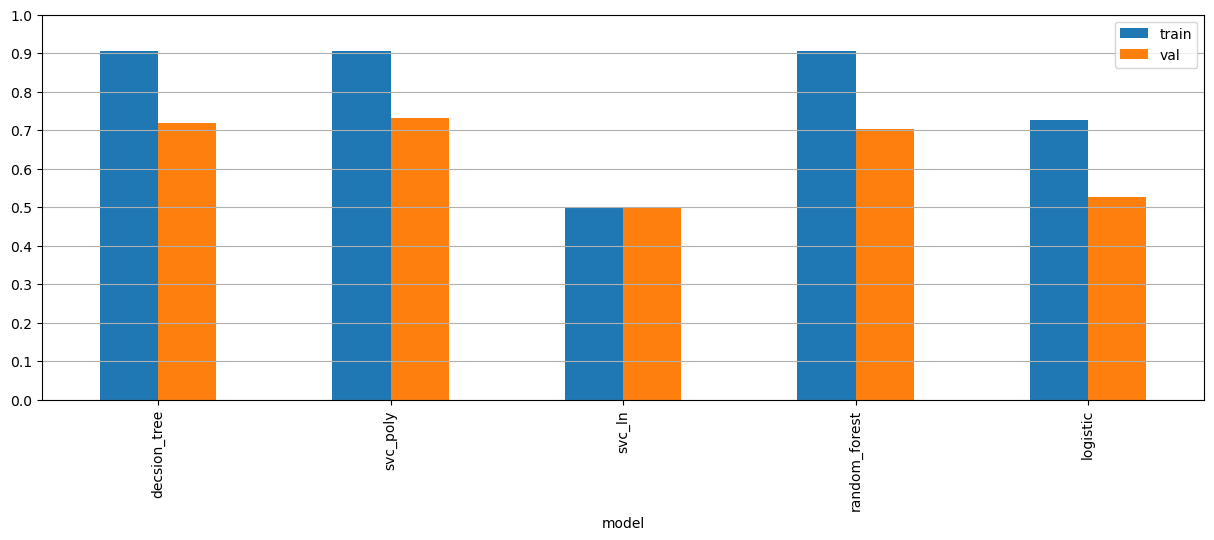

In [175]:
# Graph to compare between model.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

All_result.plot.bar(x = 'model', y = ['train', 'val'], figsize = (15, 5))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.grid(axis = 'y')
plt.legend()
plt.show()

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Test the best model.
best_model = SVC(kernel = 'poly', degree = 5, random_state = 1, C = 50)

# Train Model.
best_model.fit(X_train, y_train)

# Prdict the value of output.
y_test_pred = best_model.predict(X_test)

# Calculate accuracy of test data.
accuracy_score(y_test, y_test_pred)

0.7210657785179018

In [27]:
! pip install happytransformer

In [19]:
from happytransformer import  HappyTextToText

In [20]:
happy_tt = HappyTextToText("T5", "vennify/t5-base-grammar-correction")

05/07/2023 20:05:48 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [21]:
from happytransformer import TTSettings

beam_settings =  TTSettings(num_beams = 5, min_length = 1, max_length = 100)

In [22]:
dft.head()

NameError: name 'dft' is not defined

# Test Machine Learning And Transfer Learning Model

In [23]:
text = 'The government should a think about the whole nature'
tex = pd.DataFrame([text], columns = ['input'])
X = tfidf_vec_fit.transform(tex['input'])
dft = pd.DataFrame(X.toarray(), columns = tfidf_vec.get_feature_names_out())
pred = best_model.predict(dft)

output_text = happy_tt.generate_text(text, args=beam_settings)

if pred[0] == 1:
    print('The text is write : ' + text)
else:
    print('The text is wrong and the correction is: ' + output_text.text)

NameError: name 'best_model' is not defined

In [224]:
text = 'Learning is an ongoing part of life'
tex = pd.DataFrame([text], columns = ['input'])
X = tfidf_vec_fit.transform(tex['input'])
dft = pd.DataFrame(X.toarray(), columns = tfidf_vec.get_feature_names_out())
pred = best_model.predict(dft)

output_text = happy_tt.generate_text(text, args=beam_settings)

if pred[0] == 1:
    print('The text is write : ' + text)
else:
    print('The text is wrong and the correction is: ' + output_text.text)

The text is write : Learning is an ongoing part of life
